In [2]:
pip install yfinance==0.2.40

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 13.1 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 4.2 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-cp310-cp310-linux_x86_64.whl size=300806 sha256=f115649264809837d475d5635ad5d07a817ff0ab669810a8e188d8114de2fde0
  Stored in directory: /root/.cache/pip/wheels/75/79/e5/8838db0594cc6c587142fd2563356392ade6255c5930411069
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


**MACHINE LEARNING STOCK PREDICTION**

[*********************100%%**********************]  1 of 1 completed


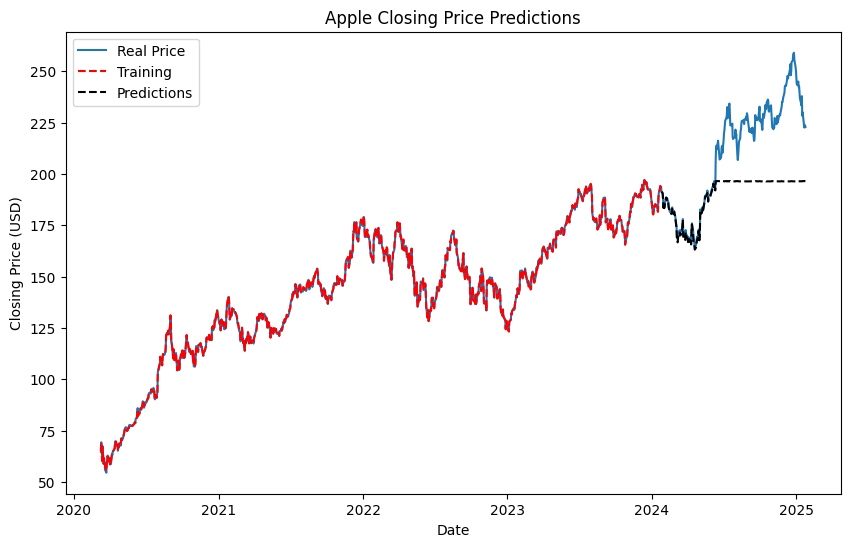

,Open,High,Low,Close,Adj Close,Volume,day before,2 days before,RA30
Date,,,,,,,,,
2020-03-09,65.937500,69.522499,65.750000,66.542503,64.664894,286744800,70.218643,71.163689,74.752184
2020-03-10,69.285004,71.610001,67.342499,71.334999,69.322159,285290000,64.664894,70.218643,74.566909
2020-03-11,69.347504,70.305000,67.964996,68.857498,66.914574,255598800,69.322159,64.664894,74.230771
2020-03-12,63.985001,67.500000,62.000000,62.057499,60.306454,418474000,66.914574,69.322159,73.620636
2020-03-13,66.222504,69.980003,63.237499,69.492500,67.531654,370732000,60.306454,66.914574,73.255138


In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader.data import DataReader
import yfinance as yf

from datetime import datetime
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Dates de début et de fin
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)
end_train = datetime(end.year - 1, end.month, end.day)


df= yf.download('AAPL',start,end)

df["day before"] = df["Adj Close"].shift(1)
df["2 days before"] = df["day before"].shift(1)
df["RA30"] = df["Adj Close"].rolling(30).mean()
df = df.dropna()

df_train = df[:end_train]
df_test = df[end_train:end]


y_train = df_train["Adj Close"]
X_train = df_train.drop(["Adj Close"],axis=1)

y_test = df_test["Adj Close"]
X_test = df_test.drop(["Adj Close"],axis=1)

# Modèle de régression XGBoost
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_hat = model.predict(X_test)
y_hat_train = model.predict(X_train)

# Création de l'axe X basé sur les dates
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Adj Close"], label="Real Price")
plt.plot(df_train.index, y_hat_train, label="Training", color = "red",linestyle = "--")
plt.plot(df_test.index, y_hat, label="Predictions", color = "black",linestyle = "--")

plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Apple Closing Price Predictions")
plt.legend()
plt.show()
df.head()

[*********************100%%**********************]  1 of 1 completed


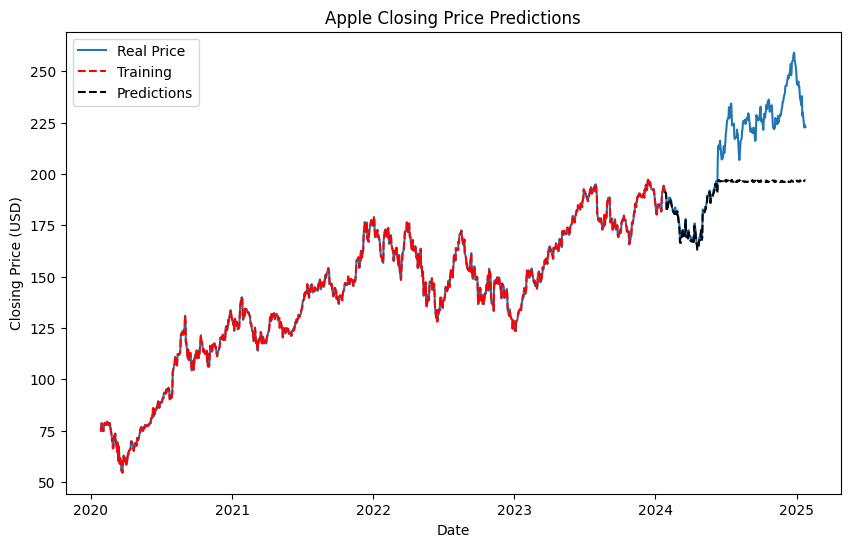

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-27,77.514999,77.942497,76.220001,77.237503,74.880409,161940000
2020-01-28,78.150002,79.599998,78.047501,79.422501,76.998718,162234000
2020-01-29,81.112503,81.962502,80.345001,81.084999,78.610489,216229200
2020-01-30,80.135002,81.022499,79.687500,80.967499,78.496574,126743200
2020-01-31,80.232498,80.669998,77.072502,77.377502,75.016136,199588400


In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader.data import DataReader
import yfinance as yf

from datetime import datetime
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Dates de début et de fin
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)
end_train = datetime(end.year - 1, end.month, end.day)


df= yf.download('AAPL',start,end)


df_train = df[:end_train]
df_test = df[end_train:end]


y_train = df_train["Adj Close"]
X_train = df_train.drop(["Adj Close"],axis=1)

y_test = df_test["Adj Close"]
X_test = df_test.drop(["Adj Close"],axis=1)

# Modèle de régression XGBoost
model =  XGBRegressor()
model.fit(X_train, y_train)

y_hat = model.predict(X_test)
y_hat_train = model.predict(X_train)

# Création de l'axe X basé sur les dates
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Adj Close"], label="Real Price")
plt.plot(df_train.index, y_hat_train, label="Training", color = "red",linestyle = "--")
plt.plot(df_test.index, y_hat, label="Predictions", color = "black",linestyle = "--")

plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Apple Closing Price Predictions")
plt.legend()
plt.show()
df.head()

[*********************100%%**********************]  1 of 1 completed
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0531
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.3946e-04
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.0141e-04
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.2325e-04
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.4639e-04
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.5162e-04
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.2615e-04
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.9806e-04
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.9516e-04
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.9697e-04


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


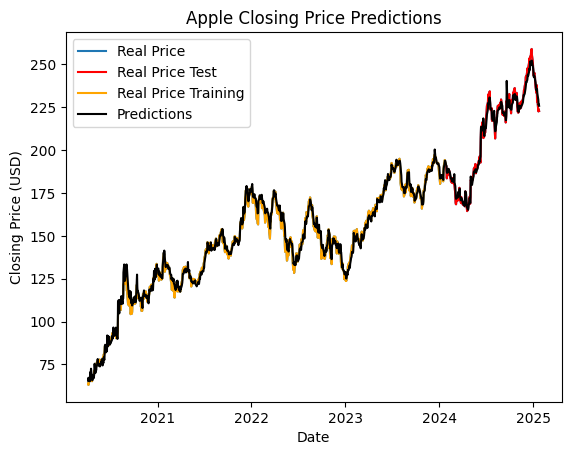

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression



from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense, LSTM



# Dates de début et de fin
end = datetime.now()
start = datetime(end.year-5, end.month, end.day)
end_train = datetime(end.year -1 , end.month, end.day)

# Téléchargement des données
df = yf.download('AAPL', start, end)

# Création de nouvelles colonnes
df["Hier"] = df["Adj Close"].shift(1)
df["Avant-hier"] = df["Hier"].shift(1)
df["RA10"] = df["Adj Close"].rolling(10).mean()
df["RA30"] = df["Adj Close"].rolling(30).mean()
df["RA50"] = df["Adj Close"].rolling(50).mean()
df = df.dropna()

# Séparation des données d'entraînement et de test
df_train = df[:end_train]
df_test = df[end_train:end]

from sklearn.preprocessing import MinMaxScaler


y_train = df_train["Adj Close"]
X_train = df_train.drop(["Adj Close"], axis=1)

scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

# Séparer les caractéristiques et la cible
y_train = df_train["Adj Close"].values.reshape(-1, 1)  # Reshape pour le scaler
X_train = df_train.drop(["Adj Close"], axis=1).values

# Appliquer le scaler aux données d'entraînement
X_train = scaler_X.fit_transform(X_train)
y_train = scaler_y.fit_transform(y_train)


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

model.fit(X_train, y_train, batch_size=10, epochs=10)

# Préparer les données de test
X_test = df_test.drop(["Adj Close"], axis=1)
X_test = scaler_X.transform(X_test)  # Transformer les données de test

# Reshape pour LSTM
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Faire des prédictions
y_hat = model.predict(X_test)
y_hat = scaler_y.inverse_transform(y_hat)


y_hat_train = model.predict(X_train)
y_hat_train = scaler_y.inverse_transform(y_hat_train)


# Visualisation des résultats 
plt.plot(df.index, df["Adj Close"], label="Real Price")
plt.plot(df_test.index, df_test["Adj Close"], label="Real Price Test",color='red')
plt.plot(df_train.index, df_train["Adj Close"], label="Real Price Training",color='orange')
plt.plot(df_train.index, y_hat_train, label="Predictions", color='black')  # Prédictions sur l'entraînement
plt.plot(df_test.index, y_hat,color='black')  # Prédictions sur le test
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Apple Closing Price Predictions")
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


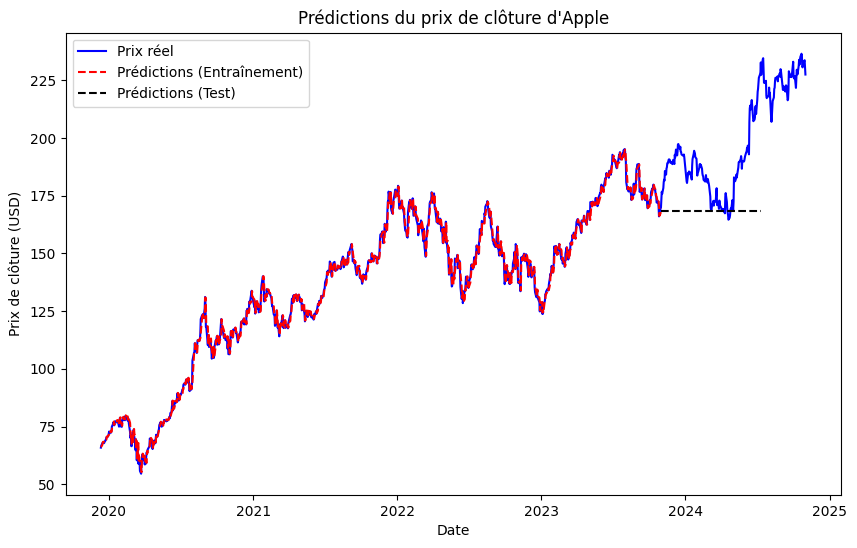

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
from sklearn.linear_model import LinearRegression

def predict(end,start,end_train,window):

    # Télécharger les données
    df = yf.download('AAPL', start, end)

    # Création de colonnes pour les jours précédents
    df["Hier"] = df["Adj Close"].shift(1)
    df["Avant-hier"] = df["Hier"].shift(1)
    df["RA"] = df["Adj Close"].rolling(window).mean()
    df = df[["Avant-hier", "Hier","RA", "Adj Close"]].dropna()

    # Séparer les données d'entraînement et de test
    df_train = df[:end_train]
    df_test = df[end_train:end]

    # Préparer les ensembles d'entraînement et de test
    y_train = df_train["Adj Close"]
    X_train = df_train.drop(["Adj Close"], axis=1)

    y_test = df_test["Adj Close"]
    X_test = df_test.drop(["Adj Close"], axis=1)

    # Préparer les prédictions initiales
    df_pred = pd.DataFrame({
        "Avant-hier": df_train["Avant-hier"].iloc[-1],
        "Hier": df_train["Hier"].iloc[-1],
        "RA" : df_train["Adj Close"].rolling(window).mean()
    }).dropna()

    model = LinearRegression()
    model.fit(X_train, y_train)


    res = []
    for _ in range(len(df_test)):
        df_pred = df_pred.dropna()
        predi = model.predict(df_pred)
        res.append(predi[0])  # Ajout de la prédiction à la liste
        # Préparer la nouvelle ligne pour les prédictions suivantes
        new_line = pd.DataFrame({
            "Avant-hier": df_pred["Hier"].iloc[-1],
            "Hier": predi[0],
           "RA" :  df["Hier"].rolling(window).mean()
        })

        df_pred = pd.concat([df_pred, new_line])  # Mettre à jour df_pred

    # Prédictions sur les ensembles de test et d'entraînement
    y_hat = model.predict(X_test)
    y_hat_train = model.predict(X_train)

    # Création de l'axe X basé sur les dates
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df["Adj Close"], label="Prix réel", color='blue')
    plt.plot(df_train.index, y_hat_train, label="Prédictions (Entraînement)", color="red", linestyle="--")
    plt.plot(pd.date_range(start=df_train.index[-1] + pd.Timedelta(days=1), periods=len(df_test)), res, label="Prédictions (Test)", color="black", linestyle="--")

    plt.xlabel("Date")
    plt.ylabel("Prix de clôture (USD)")
    plt.title("Prédictions du prix de clôture d'Apple")
    plt.legend()
    plt.show()

end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)
end_train = datetime(end.year - 1, end.month, end.day)
window = 30
predict(end,start,end_train,window)

[*********************100%%**********************]  1 of 1 completed


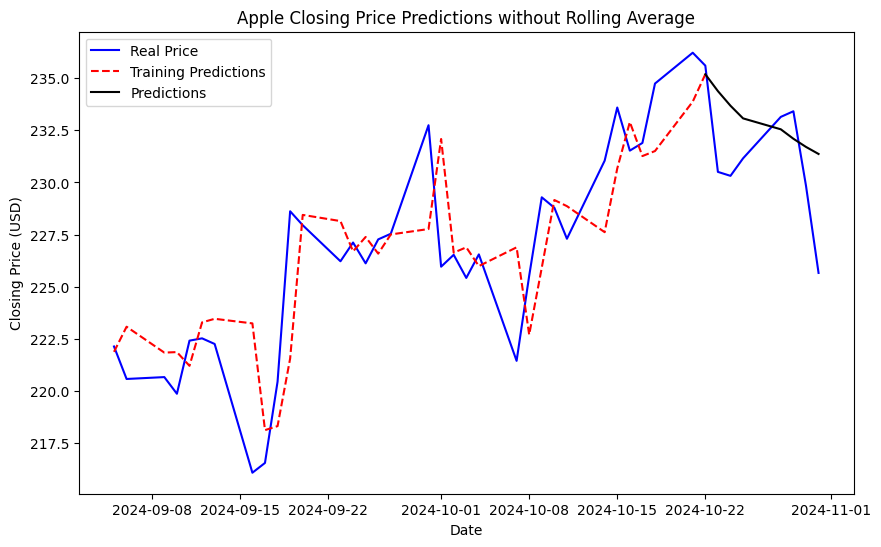

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

# Dates de début et de fin
end = datetime.strptime("2024-11-01", "%Y-%m-%d")
start = end - timedelta(days=60)  # Prendre les deux derniers mois
end_train = end - timedelta(days=10)  # Période de test sur les 10 derniers jours

# Télécharger les données
df = yf.download('AAPL', start, end)

# Création des colonnes pour les jours précédents
df["Hier"] = df["Adj Close"].shift(1)
df["Avant-hier"] = df["Hier"].shift(1)
df = df[["Avant-hier", "Hier", "Adj Close"]].dropna()

# Diviser les données en ensembles d'entraînement et de test
df_train = df[:end_train]
df_test = df[end_train:end]

y_train = df_train["Adj Close"]
X_train = df_train[["Avant-hier", "Hier"]]
y_test = df_test["Adj Close"]
X_test = df_test[["Avant-hier", "Hier"]]

# Créer un DataFrame pour stocker les prédictions futures
X_pred = pd.DataFrame({
    "Avant-hier": [df_train["Avant-hier"].iloc[-1]],
    "Hier": [df_train["Hier"].iloc[-1]],
})

# Initialiser le modèle de régression
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions pour les 10 derniers jours
res = []
for _ in range(len(df_test)):
    predi = model.predict(X_pred)
    res.append(predi[0])  # Stocker la prédiction dans la liste
    
    # Préparer la nouvelle ligne pour la prochaine prédiction
    new_line = {
        "Avant-hier": X_pred["Hier"].iloc[-1],
        "Hier": predi[0]
    }
    X_pred = pd.DataFrame(new_line, index=[0])

# Prédictions sur les ensembles de test et d'entraînement
y_hat = model.predict(X_test)
y_hat_train = model.predict(X_train)

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Adj Close"], label="Real Price", color='blue')
plt.plot(df_train.index, y_hat_train, label="Training Predictions", color="red", linestyle="--")
plt.plot(df_test.index, res, label="Predictions", color="black", linestyle="-")

# Relier la dernière prédiction de l'entraînement avec la première prédiction de test
plt.plot([df_train.index[-1], df_test.index[0]], [y_hat_train[-1], res[0]], color="black", linestyle="-")

plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Apple Closing Price Predictions without Rolling Average")
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


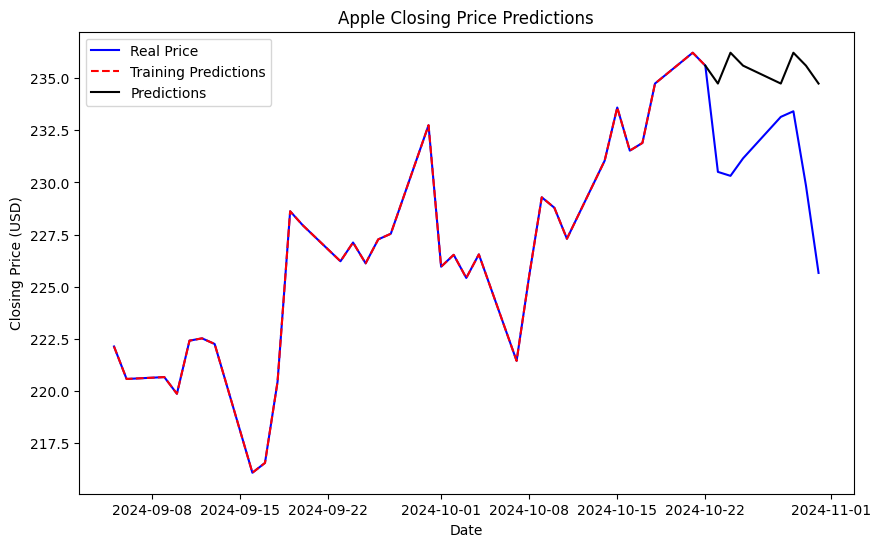

,2 days before,day before,Adj Close,Rolling average
Date,,,,
2024-09-05,222.525177,220.607300,222.135605,221.756027
2024-09-06,220.607300,222.135605,220.577332,221.106745
2024-09-09,222.135605,220.577332,220.667221,221.126719
2024-09-10,220.577332,220.667221,219.868103,220.370885
2024-09-11,220.667221,219.868103,222.415298,220.983541


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

# Dates de début et de fin
end = datetime.strptime("2024-11-01", "%Y-%m-%d")
start = end - timedelta(days=60)  # Prendre les deux derniers mois
end_train = end - timedelta(days=10)  # Période de test sur les 10 derniers jours

# Télécharger les données
df = yf.download('AAPL', start, end)

# Calculer une moyenne mobile sur 3 jours pour lisser les fluctuations
df["Rolling average"] = df["Adj Close"].rolling(window=3).mean()

# Création des colonnes pour les jours précédents
df["day before"] = df["Adj Close"].shift(1)
df["2 days before"] = df["day before"].shift(1)
df = df[["2 days before", "day before", "Adj Close", "Rolling average"]].dropna()

# Diviser les données en ensembles d'entraînement et de test
df_train = df[:end_train]
df_test = df[end_train:end]

# Préparer les ensembles d'entraînement et de test en incluant la moyenne mobile
y_train = df_train["Adj Close"]
X_train = df_train[["2 days before", "day before", "Rolling average"]]
y_test = df_test["Adj Close"]
X_test = df_test[["2 days before", "day before", "Rolling average"]]

# Créer un DataFrame pour stocker les prédictions futures
X_pred = pd.DataFrame({
    "2 days before": [df_train["2 days before"].iloc[-1]],
    "day before": [df_train["day before"].iloc[-1]],
    "Rolling average": [df_train["Rolling average"].iloc[-1]]
})

# Initialiser le modèle de régression
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions pour les 10 derniers jours
res = []
for _ in range(len(df_test)):
    predi = model.predict(X_pred)
    res.append(predi[0])  
    

    new_line = {
        "2 days before": X_pred["day before"].iloc[-1],
        "day before": predi[0],
        "Rolling average": [X_pred["Rolling average"].iloc[-1]]
    }
    X_pred = pd.DataFrame(new_line, index=[0])

# Prédictions sur les ensembles de test et d'entraînement
y_hat = model.predict(X_test)
y_hat_train = model.predict(X_train)

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Adj Close"], label="Real Price", color='blue')
plt.plot(df_train.index, y_hat_train, label="Training Predictions", color="red", linestyle="--")
plt.plot(df_test.index, res, label="Predictions", color="black", linestyle="-")

# Relier la dernière prédiction de l'entraînement avec la première prédiction de test
plt.plot([df_train.index[-1], df_test.index[0]], [y_hat_train[-1], res[0]], color="black", linestyle="-")

plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Apple Closing Price Predictions")
plt.legend()
plt.show()
df.head()


[*********************100%%**********************]  1 of 1 completed


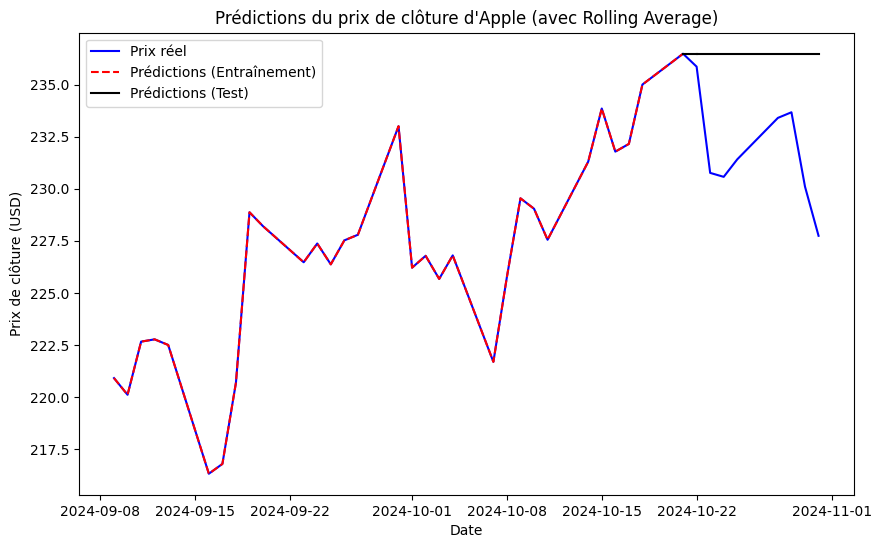

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

# Dates de début et de fin
end = datetime.now()
start = end - timedelta(days=60)  # Prendre les deux derniers mois
end_train = end - timedelta(days=10)  # Période de test sur les 10 derniers jours

# Télécharger les données
df = yf.download('AAPL', start, end)

# Création des colonnes pour les jours précédents
df["Hier"] = df["Adj Close"].shift(1)
df["Avant-hier"] = df["Hier"].shift(1)
df["RA1"] = df["Adj Close"].rolling(1).mean()
df["RA3"] = df["Adj Close"].rolling(3).mean()
df["RA5"] = df["Adj Close"].rolling(5).mean()
df = df[["Avant-hier","Hier","RA5","RA3","RA1","Adj Close"]]
df = df.dropna()

# Diviser les données en ensembles d'entraînement et de test
df_train = df[:end_train]
df_test = df[end_train:end]

# Préparer les ensembles d'entraînement et de test en incluant la moyenne mobile
y_train = df_train["Adj Close"]
X_train = df_train.drop(["Adj Close"],axis=1)
y_test = df_test["Adj Close"]
X_test = df_test.drop(["Adj Close"],axis=1)

# Créer un DataFrame pour stocker les prédictions futures
X_pred = pd.DataFrame({
    "Avant-hier": [df_train["Avant-hier"].iloc[-1]],
    "Hier": [df_train["Hier"].iloc[-1]],
    "RA5": [df_train["RA5"].iloc[-1]],
    "RA3": [df_train["RA3"].iloc[-1]],
    "RA1": [df_train["RA1"].iloc[-1]]
})

# Initialiser le modèle de régression
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions pour les 10 derniers jours
res = []
for _ in range(len(df_test)):
    predi = model.predict(X_pred)
    res.append(predi[0])  # Stocker la prédiction dans la liste
    
    # Préparer la nouvelle ligne pour la prochaine prédiction
    new_line = {
        "Avant-hier": X_pred["Hier"].iloc[-1],
        "Hier": predi[0],
        "RA5": [X_train["RA5"].iloc[-1]],
        "RA3": [X_train["RA3"].iloc[-1]],
        "RA1": [X_train["RA1"].iloc[-1]]
        }
    X_pred = pd.DataFrame(new_line, index=[0])

# Prédictions sur les ensembles de test et d'entraînement
y_hat = model.predict(X_test)
y_hat_train = model.predict(X_train)

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Adj Close"], label="Prix réel", color='blue')
plt.plot(df_train.index, y_hat_train, label="Prédictions (Entraînement)", color="red", linestyle="--")
plt.plot(df_test.index, res, label="Prédictions (Test)", color="black", linestyle="-")

# Relier la dernière prédiction de l'entraînement avec la première prédiction de test
plt.plot([df_train.index[-1], df_test.index[0]], [y_hat_train[-1], res[0]], color="black", linestyle="-")

plt.xlabel("Date")
plt.ylabel("Prix de clôture (USD)")
plt.title("Prédictions du prix de clôture d'Apple (avec Rolling Average)")
plt.legend()
plt.show()


In [70]:
### import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Dates de début et de fin
end = datetime.now()
start = end - timedelta(days=60)  # Prendre les deux derniers mois
end_train = end - timedelta(days=10)  # Période de test sur les 10 derniers jours

# Télécharger les données
df = yf.download('AAPL', start, end)

# Calculer une moyenne mobile sur 3 jours pour lisser les fluctuations


# Création des colonnes pour les jours précédents
df["Hier"] = df["Adj Close"].shift(1)
df["Avant-hier"] = df["Hier"].shift(1)
df["RA1"] = df["Adj Close"].rolling(1).mean()
df["RA3"] = df["Adj Close"].rolling(3).mean()
df["RA5"] = df["Adj Close"].rolling(5).mean()
df = df.dropna()

# Diviser les données en ensembles d'entraînement et de test
df_train = df[:end_train]
df_test = df[end_train:end]

# Préparer les ensembles d'entraînement et de test en incluant la moyenne mobile
y_train = df_train["Adj Close"]
X_train = df_train.drop(["Adj Close"], axis=1)

scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

y_train = y_train.values.reshape(-1, 1)  # Reshape pour le scaler
X_train = X_train.values

# Appliquer le scaler aux données d'entraînement
X_train = scaler_X.fit_transform(X_train)
y_train = scaler_y.fit_transform(y_train)

y_test = df_test["Adj Close"]
X_test = df_test.drop(["Adj Close"], axis=1)

X_test = scaler_X.transform(X_test)  # Transformer les données de test
y_test = y_test.values.reshape(-1, 1)
# Reshape pour LSTM
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
y_test = scaler_y.fit_transform(y_train)

# Créer un DataFrame pour stocker les prédictions futures
X_pred = pd.DataFrame({
    "Avant-hier": [df_train["Avant-hier"].iloc[-1]],
    "Hier": [df_train["Hier"].iloc[-1]],
    "RA5": [df_train["RA5"].iloc[-1]],
    "RA3": [df_train["RA3"].iloc[-1]],
    "RA1": [df_train["RA1"].iloc[-1]]
})

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

model.fit(X_train, y_train, batch_size=10, epochs=10)

# Faire des prédictions pour les 10 derniers jours
res = []
for _ in range(len(df_test)):
    predi = model.predict(X_pred)
    predi = scaler_y.inverse_transform(predi)
    res.append(predi[0])  # Stocker la prédiction dans la liste
    
    # Préparer la nouvelle ligne pour la prochaine prédiction
    new_line = {
        "Avant-hier": X_pred["Hier"].iloc[-1],
        "Hier": predi[0],
        "RA5": [X_pred["RA5"].iloc[-1]],
        "RA3": [X_pred["RA3"].iloc[-1]],
        "RA1": [X_pred["RA1"].iloc[-1]]

    }
    X_pred = pd.DataFrame(new_line, index=[0])

# Prédictions sur les ensembles de test et d'entraînement
y_hat = model.predict(X_test)
y_hat = scaler_y.inverse_transform(y_hat)
y_hat_train = model.predict(X_train)
y_hat_train = scaler_y.inverse_transform(y_hat_train)

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Adj Close"], label="Prix réel", color='blue')
plt.plot(df_train.index, y_hat_train, label="Prédictions (Entraînement)", color="red", linestyle="--")
plt.plot(df_test.index, res, label="Prédictions (Test)", color="black", linestyle="-")

# Relier la dernière prédiction de l'entraînement avec la première prédiction de test
#plt.plot([df_train.index[-1], df_test.index[0]], [y_hat_train[-1], res[0]], color="black", linestyle="-")

plt.xlabel("Date")
plt.ylabel("Prix de clôture (USD)")
plt.title("Prédictions du prix de clôture d'Apple (avec Rolling Average)")
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed

Epoch 1/10



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2188
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0312 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None